In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cpy
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
    



In [9]:
N = np.array([12.95, 13.85, 11.44, 13.58, 11.40, 11.11, 11.35, 10.84, 10.96,
    13.94, 11.78, 14.70])
C_un = np.array([-17.45, -17.43, -18.53, -17.49, -17.55, -18.81, -17.59,
       -18.76, -18.51, -17.35, -18.16, -16.98])

In [10]:
C_norm = np.zeros(12)

In [11]:
i=0
n = 0
for i in C_un:
    for y in N: 
        i += 0
        n += 0
        C_norm[i] = x[n] - 3.32 + 0.99 * (x[n]/y[n])
   

NameError: name 'x' is not defined

In [12]:
C_norm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
for i in range(0,len(C_un)):
   
        C_norm[i] = C_un[i] - 3.32 + 0.99 * (C_un[i]/N[i])

In [14]:
C_norm

array([-22.10401544, -21.99589892, -23.45355769, -22.08504418,
       -22.39407895, -23.80613861, -22.44428194, -23.79332103,
       -23.50197993, -21.9021736 , -23.00617997, -21.44355102])

In [15]:
file = 'HB_data.xlsx'
iso_data = pd.read_excel(file)

In [16]:
iso_data

,Species,Sample ID,Size (in inches),"d15N (permil, AIR)","d13Corganic (permil, VPDB)",%N,TOC (%)
0,Red Snapper,HB-1-1,15.50,12.95,-17.45,14.50,45.17
1,G. Amberjack,HB-1-2,34.00,13.85,-17.43,14.22,45.12
2,Red Snapper,HB-2-3,24.00,11.44,-18.53,14.07,46.44
3,G. Amberjack,HB-3-4,25.75,13.58,-17.49,14.21,44.65
4,Blackfin Tuna,HB-4-5,25.00,11.40,-17.55,14.09,46.41
5,Red Snapper,HB-4-6,23.00,11.11,-18.81,13.81,45.81
6,Red Snapper,HB-4-7,26.00,11.35,-17.59,14.20,46.49
7,Red Snapper,HB-5-8,23.00,10.84,-18.76,14.10,45.35
8,Red Snapper,HB-5-9,22.00,10.96,-18.51,14.53,45.00
9,G. Amberjack,HB-6-10,33.00,13.94,-17.35,14.50,45.19


In [17]:
C_un1 = iso_data['d13Corganic (permil, VPDB)']
N1 = iso_data['d15N (permil, AIR)']

In [18]:
C_N = iso_data['d13Corganic (permil, VPDB)']/iso_data['d15N (permil, AIR)']

In [19]:
C_N

0    -1.347490
1    -1.258484
2    -1.619755
3    -1.287923
4    -1.539474
5    -1.693069
6    -1.549780
7    -1.730627
8    -1.688869
9    -1.244620
10   -1.541596
11   -1.155102
dtype: float64

In [20]:
Constant = C_un1 -3.33 + 0.99

In [21]:
Constant

0    -19.79
1    -19.77
2    -20.87
3    -19.83
4    -19.89
5    -21.15
6    -19.93
7    -21.10
8    -20.85
9    -19.69
10   -20.50
11   -19.32
Name: d13Corganic (permil, VPDB), dtype: float64

In [22]:
norm = Constant * C_N

In [23]:
norm

0     26.666834
1     24.880224
2     33.804292
3     25.539521
4     30.620132
5     35.808416
6     30.887110
7     36.516236
8     35.212911
9     24.506564
10    31.602716
11    22.316571
dtype: float64

In [24]:
def lat_lon_formatter(ax):
    """
    Creates nice latitude/longitude labels
    for maps
    """
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(labelsize=16)
    
# the below function uses lat_lon_formatter above
def set_up_map(ax, x0, x1, y0, y1):
    """
    Adds coastline, etc.
    
    x0, x1: longitude bounds to zoom into
    y0, y1: latitude bounds to zoom into
    """
    # set up land overlay
    ax.add_feature(cfeature.LAND, facecolor='navy')
    
    # zoom in on region of interest
    ax.set_extent([x0, x1, y0, y1])
    
    # set nicer looking ticks
    ax.set_xticks(np.arange(x0, x1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(y0, y1, 10), crs=ccrs.PlateCarree())
    lat_lon_formatter(ax)


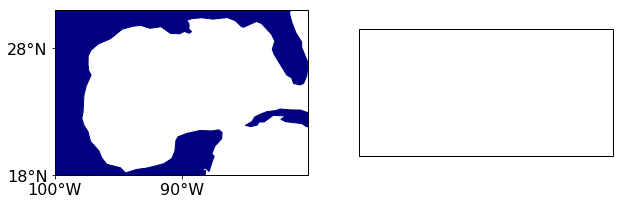

In [29]:
f, ax = plt.subplots(ncols=2, figsize=(10,5),
                     subplot_kw=dict(projection=ccrs.PlateCarree())) # this last bit is the map projection from Cartopy
set_up_map(ax[0], -100, -80, 18, 31)



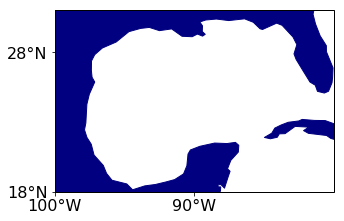

In [31]:
fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, -100, -80, 18, 31)



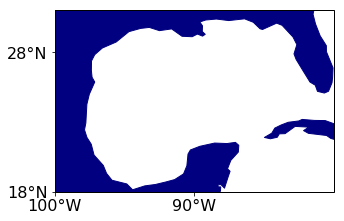

In [47]:
fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, -100, -80, 18, 31)


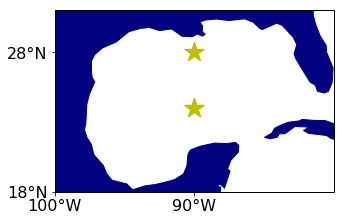

In [56]:
ax.scatter(-90,28 ,transform=ccrs.PlateCarree(), marker='*', s=4, c='y')
ax.scatter(-90,24 ,transform=ccrs.PlateCarree(), marker='*', s=4, c='y')
fig

In [60]:
x0 = input('Coordinate 1: ')
x1 = input('Coordinate 2: ')
x2 = input('Coordinate 3: ')
x3 = input('Coordinate 4: ')

Coordinate 1: -100
Coordinate 2: -80
Coordinate 3: 18
Coordinate 4: 31


TypeError: must be real number, not str

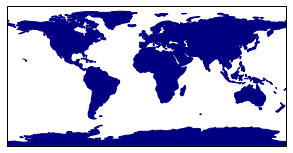

In [61]:
fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
set_up_map(ax, x0, x1, x2, x3)

In [62]:
x1

'-80'